In [137]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import hinge_loss

In [138]:
data = pd.read_excel('Youngs.xlsx')

le = LabelEncoder()
data['Cluster'] = le.fit_transform(data['Cluster'])     # 0 = healthy, 1 = unhealthy

dataTable = pd.DataFrame({
    'Youngs': data['Youngs'],
    'Cluster': data['Cluster']
})

dataTable

,Youngs,Cluster
0,0.281311,0
1,0.291023,0
2,0.547790,0
3,0.267531,0
4,0.428772,0
...,...,...
1273,9.579085,1
1274,7.286583,1
1275,8.255359,1
1276,9.484976,1


In [139]:
X = dataTable[['Youngs']]
y = dataTable['Cluster']

# train/test split (80/20)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

scalar = StandardScaler().fit(x_train)
x_train_transformed = scalar.transform(x_train)
x_test_transformed = scalar.transform(x_test)

In [140]:
hyperparameter_score_list = []
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for c in np.arange(0.5,3,0.5):
        svm = SVC(kernel=kernel, C=c).fit(x_train_transformed, y_train)
        scores = cross_validate(svm, x_train_transformed, y_train, cv=10, scoring='accuracy')
        mean_score = np.mean(scores['test_score'])
        y_train_pred = svm.predict(x_train_transformed)
        loss = hinge_loss(y_train, y_train_pred)
        hyperparameter_score_list.append([kernel, c, mean_score, loss])

myTable = PrettyTable(["Kernel", "C", "Avg accuracy", "Hinge loss"])
for row in hyperparameter_score_list:
    myTable.add_row([row[0], row[1], round(row[2],3), round(row[3],3)])
print(myTable)

+---------+-----+--------------+------------+
|  Kernel |  C  | Avg accuracy | Hinge loss |
+---------+-----+--------------+------------+
|  linear | 0.5 |    0.973     |    0.69    |
|  linear | 1.0 |    0.979     |   0.683    |
|  linear | 1.5 |    0.985     |   0.677    |
|  linear | 2.0 |    0.989     |   0.669    |
|  linear | 2.5 |    0.994     |   0.666    |
|   poly  | 0.5 |    0.967     |   0.697    |
|   poly  | 1.0 |    0.967     |   0.697    |
|   poly  | 1.5 |    0.968     |   0.695    |
|   poly  | 2.0 |     0.97     |   0.694    |
|   poly  | 2.5 |    0.971     |   0.693    |
|   rbf   | 0.5 |    0.979     |   0.683    |
|   rbf   | 1.0 |    0.989     |   0.669    |
|   rbf   | 1.5 |    0.996     |   0.663    |
|   rbf   | 2.0 |    0.994     |   0.665    |
|   rbf   | 2.5 |    0.994     |   0.667    |
| sigmoid | 0.5 |    0.974     |    0.69    |
| sigmoid | 1.0 |    0.978     |    0.68    |
| sigmoid | 1.5 |    0.986     |   0.676    |
| sigmoid | 2.0 |     0.99     |  

In [141]:
best_kernel = 'linear'
best_C = 2.5
best_svm = SVC(kernel=best_kernel, C=best_C).fit(x_train_transformed, y_train)
print(best_svm.support_vectors_)

[[0.30216612]
 [0.23009009]
 [0.32102559]
 [0.26477939]
 [0.21670731]
 [0.32068136]
 [0.21025162]
 [0.23393646]
 [0.32638919]
 [0.2427444 ]
 [0.32536522]
 [0.2426435 ]
 [0.21682424]
 [0.20950833]
 [0.24753378]
 [0.27253398]
 [0.31378024]
 [0.31019503]
 [0.22280423]
 [0.30155751]
 [0.28841603]
 [0.318171  ]
 [0.29688495]
 [0.31861044]
 [0.28810629]
 [0.25271792]
 [0.22049491]
 [0.22384535]
 [0.37879595]
 [0.32965053]
 [0.33552112]
 [0.34786952]
 [0.34043946]
 [0.39972499]
 [0.41284135]
 [0.35583631]
 [0.39478826]
 [0.34487044]
 [0.34773093]
 [0.39142256]
 [0.37746307]
 [0.42871552]
 [0.36697256]
 [0.34366559]
 [0.42822981]
 [0.39675157]
 [0.39670128]
 [0.41760585]
 [0.39094271]
 [0.34114754]
 [0.46432339]
 [0.35427766]
 [0.44821296]
 [0.41457305]
 [0.33063557]
 [0.37500405]]


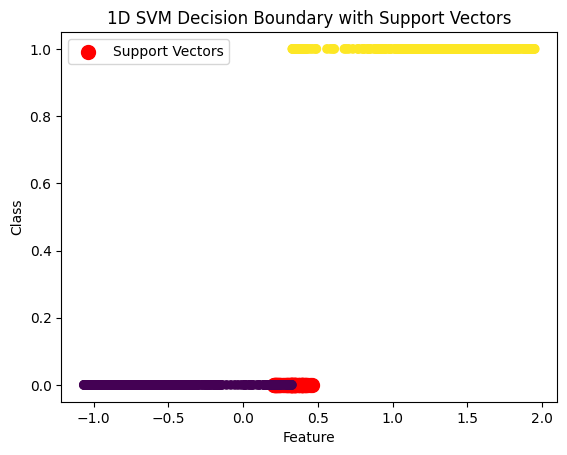

In [142]:
best_kernel = 'linear'
best_C = 2.5
best_svm = SVC(kernel=best_kernel, C=best_C).fit(x_train_transformed, y_train)

"""
x_min, x_max = x_train_transformed.min() - 1, x_train_transformed.max() + 1
x_plot = np.linspace(x_min, x_max, 1000)
y_plot = best_svm.decision_function(x_plot.reshape(-1, 1))

plt.plot(x_plot, y_plot, color='black', linestyle='-', linewidth=2)
"""

support_vectors = best_svm.support_vectors_
plt.scatter(support_vectors, np.zeros_like(support_vectors), color='red', marker='o', s=100, label='Support Vectors')

plt.scatter(x_train_transformed, y_train, c=y_train, cmap='viridis')

plt.xlabel("Feature")
plt.ylabel("Class")
plt.title("1D SVM Decision Boundary with Support Vectors")
plt.legend()
plt.show()